In [120]:
import matplotlib.pyplot as plt
import string
from pandas import read_csv
import math
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
from sklearn import metrics

In [121]:
godseye=read_csv("dasss1.csv")

In [122]:
type(godseye)

pandas.core.frame.DataFrame

In [123]:
godseye.dtypes

T             int64
LX          float64
LY          float64
RX          float64
RY          float64
name         object
gender       object
dyslexia     object
dtype: object

In [124]:
godseye=godseye.drop([0,1],axis='rows')

In [125]:
godseye['ll']=np.sqrt(((godseye['LX'])**2+((godseye['LY'])**2)))
godseye['rr']=np.sqrt(((godseye['RX'])**2+((godseye['RY'])**2)))
#godseye['lm']=np.round(godseye['LY']/godseye['LX'])
#godseye['rm']=np.round(godseye['RY']/godseye['RX'])

In [126]:
godseye

,T,LX,LY,RX,RY,name,gender,dyslexia,ll,rr
2,40,6.553600e+13,6.553700e+04,99999999.96,65536.00,322e1m,male,yes,6.553600e+13,1.000000e+08
3,60,6.553600e+13,6.553600e+13,99999999.96,65536.00,322e1m,male,yes,9.268190e+13,1.000000e+08
4,80,6.553600e+13,6.553700e+04,65537.00,65536.00,322e1m,male,yes,6.553600e+13,9.268261e+04
5,100,6.553600e+13,6.553700e+04,65537.00,-99999999.96,322e1m,male,yes,6.553600e+13,1.000000e+08
6,120,6.553600e+13,6.553600e+13,65537.00,0.00,322e1m,male,yes,9.268190e+13,6.553700e+04
...,...,...,...,...,...,...,...,...,...,...
13488,24900,5.701915e+06,5.505086e+06,5570843.00,5570622.00,133A4M,female,no,7.925769e+06,7.878205e+06
13489,24920,5.439772e+06,5.505086e+06,5308701.00,5570622.00,133A4M,female,no,7.739321e+06,7.695072e+06
13490,24940,5.636384e+06,5.505086e+06,576746.00,5570622.00,133A4M,female,no,7.878756e+06,5.600399e+06
13491,24960,5.701923e+06,5.505086e+06,5767459.00,5570622.00,133A4M,female,no,7.925774e+06,8.018442e+06


In [127]:
godseye=godseye.drop(['LX','LY','RX','RY','name'],axis='columns')

In [128]:
#godseye['ll']=godseye['ll']/10**5
#godseye['rr']=godseye['rr']/10**5

In [129]:
godseye=godseye.query('ll < 10**8')
godseye=godseye.query('rr < 10**8')

In [130]:
godseye

,T,gender,dyslexia,ll,rr
9,180,male,yes,9.268190e+04,1.465421e+05
12,240,male,yes,1.465425e+05,1.465421e+05
13,260,male,yes,1.465425e+05,1.465425e+05
14,280,male,yes,9.268190e+04,9.268119e+04
15,300,male,yes,1.465425e+05,1.853638e+05
...,...,...,...,...,...
13488,24900,female,no,7.925769e+06,7.878205e+06
13489,24920,female,no,7.739321e+06,7.695072e+06
13490,24940,female,no,7.878756e+06,5.600399e+06
13491,24960,female,no,7.925774e+06,8.018442e+06


In [131]:
godseye.describe()

,T,ll,rr
count,13152.000000,1.315200e+04,1.315200e+04
mean,17711.618005,6.853025e+06,6.864905e+06
std,10641.383898,5.017164e+06,5.097740e+06
min,20.000000,2.622799e+04,2.621400e+04
25%,8780.000000,3.345342e+06,3.308633e+06
50%,17100.000000,5.846014e+06,5.886991e+06
75%,25560.000000,9.048714e+06,9.071848e+06
max,39980.000000,3.617820e+07,5.004963e+07


In [132]:
#godseye=godseye.head()
#godseye=godseye[['T','ll','rr']]
godseye.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13152 entries, 9 to 13492
Data columns (total 5 columns):
T           13152 non-null int64
gender      13152 non-null object
dyslexia    13152 non-null object
ll          13152 non-null float64
rr          13152 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 616.5+ KB


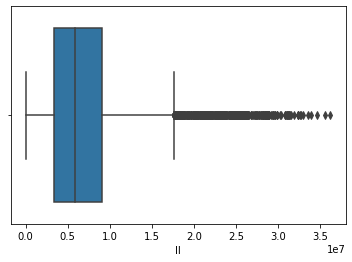

In [133]:
#plt.plot(godseye['T'],godseye['ll'])
sns.boxplot(x=godseye['ll'])

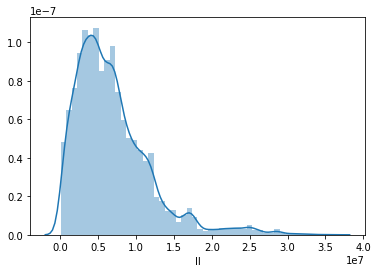

In [134]:
sns.distplot(godseye['ll'])

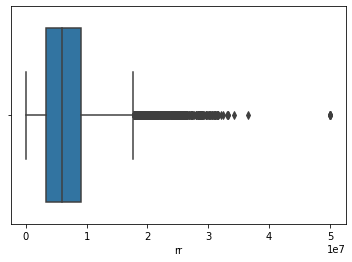

In [135]:
sns.boxplot(x=godseye['rr'])

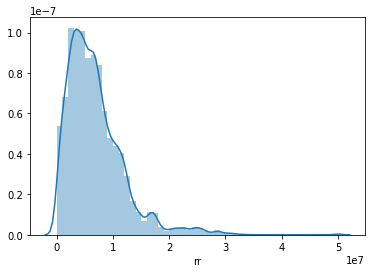

In [136]:
sns.distplot(godseye['rr'])

In [137]:
#ax = sns.lineplot(x="T", y="ll", hue="gender", data=godseye)

In [138]:
#sns.pairplot(godseye, hue='dyslexia');

In [139]:
godseye

,T,gender,dyslexia,ll,rr
9,180,male,yes,9.268190e+04,1.465421e+05
12,240,male,yes,1.465425e+05,1.465421e+05
13,260,male,yes,1.465425e+05,1.465425e+05
14,280,male,yes,9.268190e+04,9.268119e+04
15,300,male,yes,1.465425e+05,1.853638e+05
...,...,...,...,...,...
13488,24900,female,no,7.925769e+06,7.878205e+06
13489,24920,female,no,7.739321e+06,7.695072e+06
13490,24940,female,no,7.878756e+06,5.600399e+06
13491,24960,female,no,7.925774e+06,8.018442e+06


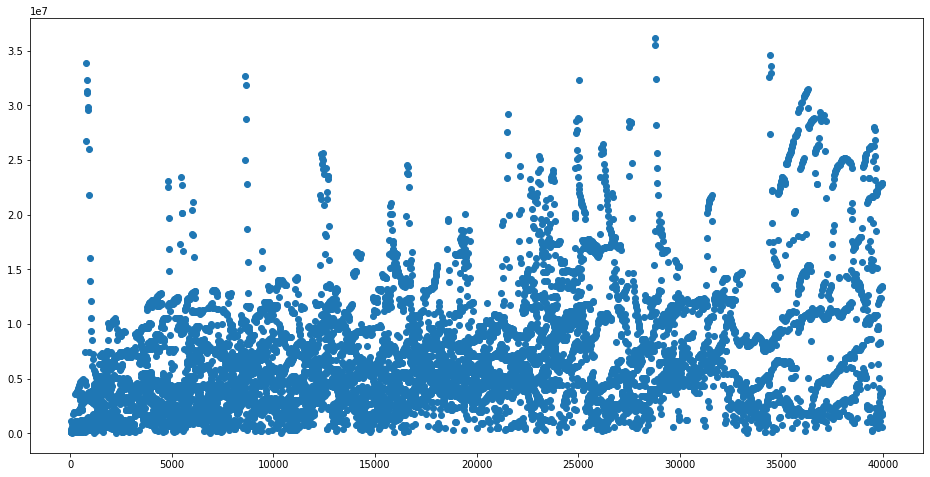

In [140]:
fig,ax=plt.subplots(figsize=(16,8))
plt.scatter(godseye['T'],godseye['ll'])

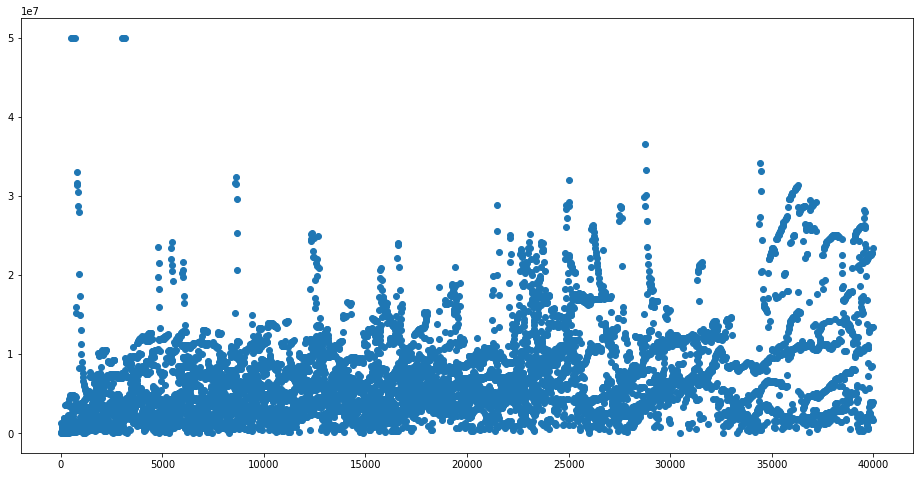

In [141]:
fig,ax=plt.subplots(figsize=(16,8))
plt.scatter(godseye['T'],godseye['rr'])

In [142]:
def outliersDetector(contact_df, columnName):
    Q1 = contact_df[columnName].quantile(0.25)
    Q3 = contact_df[columnName].quantile(0.75)


    IQR = Q3 - Q1

    lower_outlier_bound = Q1 - 1.5*IQR
    upper_outlier_bound = Q3 + 1.5*IQR

    print("Q1", Q1)
    print("Q3", Q3)

    print("IQR", IQR)

    print("lower_outlier_bound", lower_outlier_bound)
    print("upper_outlier_bound", upper_outlier_bound)
    print()
    print("outliers for age variable are : ")
    print(contact_df[(contact_df[columnName] < lower_outlier_bound) | (contact_df[columnName] > upper_outlier_bound)])

    print(contact_df[(contact_df[columnName] < lower_outlier_bound) | (contact_df[columnName] > upper_outlier_bound)].index)
    # dropping outliers
    contact_df=contact_df.drop(contact_df[(contact_df[columnName]  < lower_outlier_bound) | (contact_df[columnName]  > upper_outlier_bound)].index, inplace=True)

In [143]:
outliersDetector(godseye,'ll')

Q1 3345342.474898236
Q3 9048713.888778228
IQR 5703371.413879992
lower_outlier_bound -5209714.645921754
upper_outlier_bound 17603771.009598218

outliers for age variable are : 
           T  gender dyslexia            ll            rr
2239    4800    male      yes  2.255210e+07  2.353485e+07
2240    4820    male      yes  2.307623e+07  2.156938e+07
2241    4840    male      yes  1.966955e+07  1.822840e+07
2271    5440    male      yes  2.341826e+07  2.346933e+07
2273    5480    male      yes  2.274865e+07  2.124183e+07
...      ...     ...      ...           ...           ...
13431  23760  female       no  2.378026e+07  2.405045e+07
13432  23780  female       no  2.409915e+07  6.041999e+06
13433  23800  female       no  2.307954e+07  2.169883e+07
13434  23820  female       no  2.098563e+07  2.049788e+07
13435  23840  female       no  1.940938e+07  1.811392e+07

[486 rows x 5 columns]
Int64Index([ 2239,  2240,  2241,  2271,  2273,  2274,  2275,  2298,  2299,
             2300,
          

In [144]:
outliersDetector(godseye,'rr')

Q1 3213987.5903111426
Q3 8623004.629445735
IQR 5409017.039134593
lower_outlier_bound -4899537.968390747
upper_outlier_bound 16736530.188147625

outliers for age variable are : 
           T  gender dyslexia            ll            rr
26       520    male      yes  2.322622e+05  5.004963e+07
28       560    male      yes  2.229195e+06  5.004675e+07
30       600    male      yes  2.229194e+05  5.004963e+07
2238    4780    male      yes  3.333324e+06  1.979877e+07
2270    5420    male      yes  1.733353e+07  2.203466e+07
...      ...     ...      ...           ...           ...
13411  23360  female       no  1.656573e+07  1.737456e+07
13413  23400  female       no  6.830723e+06  2.175072e+07
13418  23500  female       no  4.009579e+06  1.775031e+07
13420  23540  female       no  1.758537e+07  1.773809e+07
13426  23660  female       no  2.426972e+06  2.380335e+07

[216 rows x 5 columns]
Int64Index([   26,    28,    30,  2238,  2270,  2272,  2301,  3160,  3332,
             3921,
         

In [145]:
godseye

,T,gender,dyslexia,ll,rr
9,180,male,yes,9.268190e+04,1.465421e+05
12,240,male,yes,1.465425e+05,1.465421e+05
13,260,male,yes,1.465425e+05,1.465425e+05
14,280,male,yes,9.268190e+04,9.268119e+04
15,300,male,yes,1.465425e+05,1.853638e+05
...,...,...,...,...,...
13488,24900,female,no,7.925769e+06,7.878205e+06
13489,24920,female,no,7.739321e+06,7.695072e+06
13490,24940,female,no,7.878756e+06,5.600399e+06
13491,24960,female,no,7.925774e+06,8.018442e+06


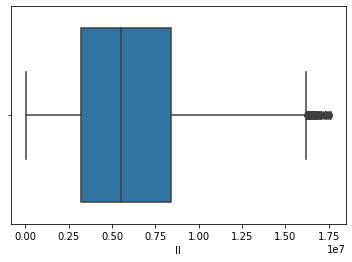

In [146]:
sns.boxplot(x=godseye['ll'])

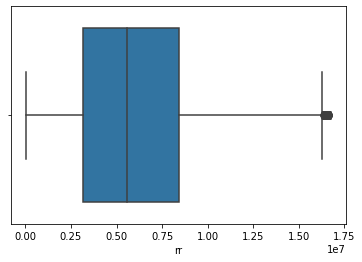

In [147]:
sns.boxplot(x=godseye['rr'])

In [148]:
godseye

,T,gender,dyslexia,ll,rr
9,180,male,yes,9.268190e+04,1.465421e+05
12,240,male,yes,1.465425e+05,1.465421e+05
13,260,male,yes,1.465425e+05,1.465425e+05
14,280,male,yes,9.268190e+04,9.268119e+04
15,300,male,yes,1.465425e+05,1.853638e+05
...,...,...,...,...,...
13488,24900,female,no,7.925769e+06,7.878205e+06
13489,24920,female,no,7.739321e+06,7.695072e+06
13490,24940,female,no,7.878756e+06,5.600399e+06
13491,24960,female,no,7.925774e+06,8.018442e+06


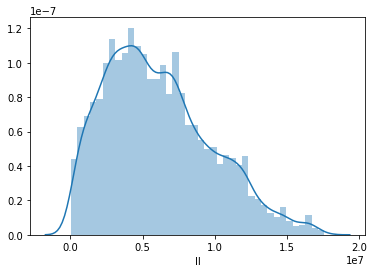

In [149]:
sns.distplot(godseye['ll'])

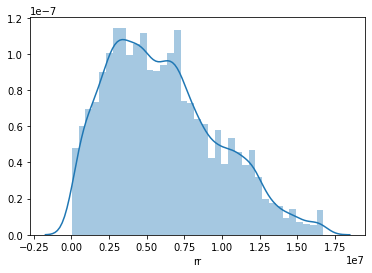

In [150]:
sns.distplot(godseye['rr'])

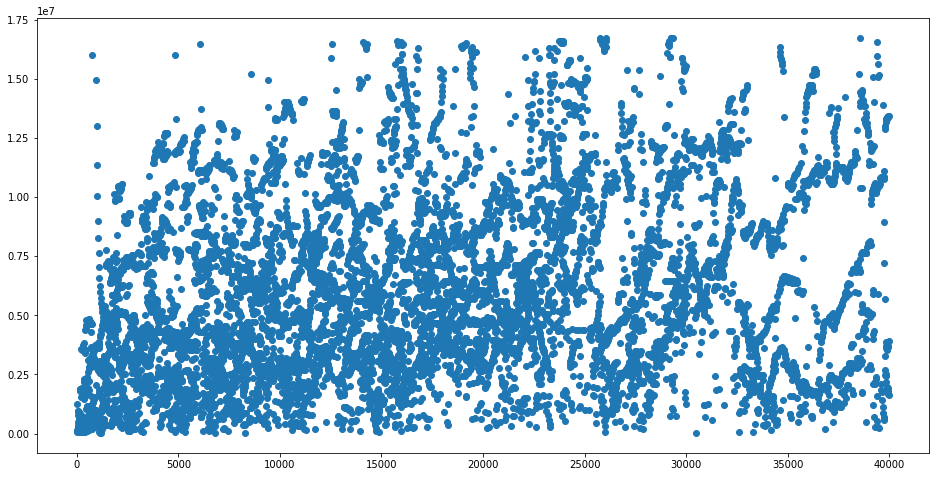

In [151]:
fig,ax=plt.subplots(figsize=(16,8))
plt.scatter(godseye['T'],godseye['rr'])

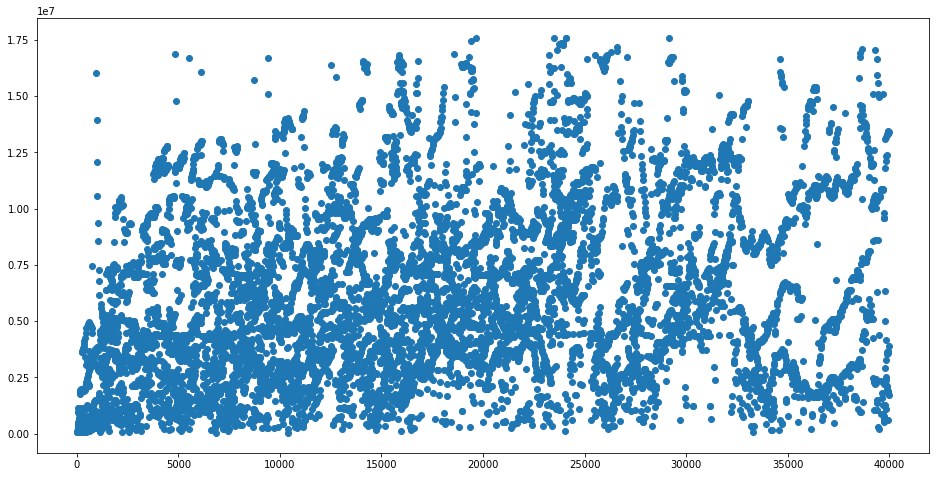

In [152]:
fig,ax=plt.subplots(figsize=(16,8))
plt.scatter(godseye['T'],godseye['ll'])

In [153]:
godseye.shape

(12450, 5)

In [154]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
   # res_df['T'] = le.fit_transform(res_df['T'])
  #  res_df['ll'] = le.fit_transform(res_df['ll'])
  #  res_df['rr'] = le.fit_transform(res_df['rr'])
    res_df['gender'] = le.fit_transform(res_df['gender'])
    res_df['dyslexia'] = le.fit_transform(res_df['dyslexia'])
    return res_df

In [155]:
encoded_df = preprocessor(godseye)
#train, test = train_test_split(godseye,test_size=0.2)
x=encoded_df[['T', 'll', 'rr']]

In [156]:
y=encoded_df[['dyslexia']]

In [157]:
x=preprocessing.normalize(x)

In [158]:
#encoded_df[['T', 'll', 'rr']]=x
encoded_df

,T,gender,dyslexia,ll,rr
9,180,1,1,9.268190e+04,1.465421e+05
12,240,1,1,1.465425e+05,1.465421e+05
13,260,1,1,1.465425e+05,1.465425e+05
14,280,1,1,9.268190e+04,9.268119e+04
15,300,1,1,1.465425e+05,1.853638e+05
...,...,...,...,...,...
13488,24900,0,0,7.925769e+06,7.878205e+06
13489,24920,0,0,7.739321e+06,7.695072e+06
13490,24940,0,0,7.878756e+06,5.600399e+06
13491,24960,0,0,7.925774e+06,8.018442e+06


In [159]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [160]:
god=DecisionTreeClassifier()
god=god.fit(x_train,y_train)
ypred=god.predict(x_test)

In [161]:
god

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [162]:
metrics.accuracy_score(y_test, ypred)

0.6562248995983936

In [163]:
confusion_matrix(y_test,ypred)

array([[ 605,  416],
       [ 440, 1029]], dtype=int64)

In [164]:
from sklearn.tree import plot_tree

In [166]:
viz=plot_tree(god, filled=True)
viz.show() 

AttributeError: 'list' object has no attribute 'save'

Error in callback <function flush_figures at 0x00000226A00C83A8> (for post_execute):


KeyboardInterrupt: 

In [111]:
tn,fp,fn,tp=confusion_matrix(y_test,ypred.round()).ravel()

In [112]:
acc=(tn+tp)*100/(tp+tn+fp+fn)
acc

66.46586345381526

In [113]:
pre=tp*100/(tp+fp)
pre

70.36784741144415

In [114]:
re=tp*100/(tp+fn)
re

72.08653175157013

In [115]:
f1=(2*pre*re)/(pre+re)
f1

71.2168217855912